<a href="https://colab.research.google.com/github/shahzarhusain/netflix_data_analysis/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


Business problems:
1. What type to focus on i.e. Movies or TV Shows?
2. Country wise contribution of content!
3. Shows rating distribution on platform!
4. Analysing past year trends.



In [120]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

# Basic exploration

In [121]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [122]:
df.shape

(8807, 12)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It seems that majority of our data is in correct format except date_added and release_year. We will convert the except_date into datetime later. Now, let's see if release_year being in int64, can give us any insights.

In [124]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We can see that the range of Release year is 1925 to 2021. As of now, median and mean for the year column does not seem to make much sense. We will explore it further later.

In [125]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [126]:
# let's try to briefly explore the categorical features in our dataset
df[['type', 'director', 'cast', 'country', 'date_added','rating', 'duration', 'listed_in']].describe()

,type,director,cast,country,date_added,rating,duration,listed_in
count,8807,6173,7982,7976,8797,8803,8804,8807
unique,2,4528,7692,748,1767,17,220,514
top,Movie,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies"
freq,6131,19,19,2818,109,3207,1793,362


As we can see that descibe function on Categorical columns gives us some interesting and quick insights about our data.
1. **Type** - We have more movies in our dataset than TV shows
2. **Director** - We have 4528 unique directors in our dataset. As of now, it seems that Rajiv Chilaka has directed the most number of movies i.e. 19.
3. **Cast** - The person to appear in movies/TV shows is David Attenborough, who seems to have acted in 19 different movies/shows.
4. **Country** - It seems that majority of content has been produced in US. however, an interestint point to note here is that the unique count of countries is coming to be **748**, this seems a bit odd as in total there are **195** countries only.
5. **Date_added** - January 1, 2020 seems to be the when most number of content is added.
6. **Rating** - Most of the content is rated as **TV-MA** i.e. for mature audience or age 17+
7. **Duration** - As we know that our dataset has movies as well as TV shows. We will have to explore further.
8. **Listed_in** - We currently seems to have 514 unique Genres combination out of which 'Dramas, International Movies' seems to be the most occuring one.

# Data Cleaning

In [127]:
# defining a function to check for the missing data in our dataset
def data_missing(x):
  data_missing = x.isnull().sum()/len(x)*100
  data_missing = data_missing[data_missing>0].sort_values()
  return data_missing

In [128]:
missing_df = data_missing(df)
missing_df

duration       0.034064
rating         0.045418
date_added     0.113546
cast           9.367549
country        9.435676
director      29.908028
dtype: float64

In [129]:
100/len(df) #percentage if 1 row has a missing data

0.011354604292040422

We can see that we have a good amount of data missing in our dataset, especially in Director, country and cast column. Additionally, we have 3, 4 and 10 rows missing for duration, rating and date_added columns respectively.

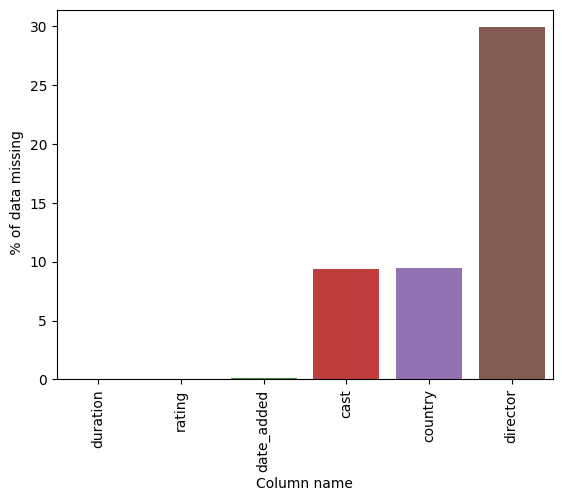

In [130]:
sns.barplot(x = missing_df.index, y = missing_df)
plt.xticks(rotation = 90)
plt.ylabel(' % of data missing')
plt.xlabel('Column name')
plt.show()

## Missing value treatment

In [131]:
# For all the rows which have missing date_added, we can see that the release year is not that old and Netflix exists.
#Hence, we will consider the movie to be added the same year and fill the values accordingly
df[df['date_added'].isnull()]['release_year']

6066    2013
6174    2018
6795    2003
6806    2003
6901    2008
7196    2010
7254    2012
7406    2016
7847    2015
8182    2015
Name: release_year, dtype: int64

In [132]:
# function to convert the release year in date
def fill_date(x):
  d = pd.to_datetime(str(x['release_year']))
  x['date_added'] = d.month_name() + ' ' + str(d.day) +',' + str(d.year)
  return x

In [133]:
#df[df['date_added'].isnull()] =
df[df['date_added'].isnull()].apply(fill_date, axis = 1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1,2013",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,"January 1,2018",2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"January 1,2003",2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"January 1,2003",2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"January 1,2008",2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,"January 1,2010",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,"January 1,2012",2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1,2016",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1,2015",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,"January 1,2015",2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [134]:
df[df['date_added'].isnull()] = df[df['date_added'].isnull()].apply(fill_date, axis = 1)

In [135]:
# We have movies as well as TV shows in our dataset. Duration column data is not consistent and we have 3 missing rows, we will drop them
df = df.dropna(subset=['duration'])

In [136]:
# as we have only 4 rows missing for rating, we will fill them as NR - not rated
df['rating'] = df['rating'].fillna('NR')

<ipython-input-136-25b415e728f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('NR')


In [137]:
data_missing(df)

cast         9.370741
country      9.438891
director    29.918219
dtype: float64

In [138]:
# We will fill the remaing values with 'unknown' as the missing data is in good ratio
df.fillna('Unknown', inplace= True)

In [139]:
data_missing(df)

Series([], dtype: float64)

## Nested data - Cast, listed_in, director, country

In [140]:
# as we have nested data in below columns and these are saved as a string. We will use the split function to convert them into list and then explode the rows as per the requirement
df['director'] = df['director'].str.split(',')
df['cast'] = df['cast'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')
df['country'] = df['country'].str.split(',')

In [141]:
data_missing(df)

Series([], dtype: float64)

# Data exploration & Visualisation

## Content Type

In [142]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[Unknown],[Unknown],[Unknown],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[Unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


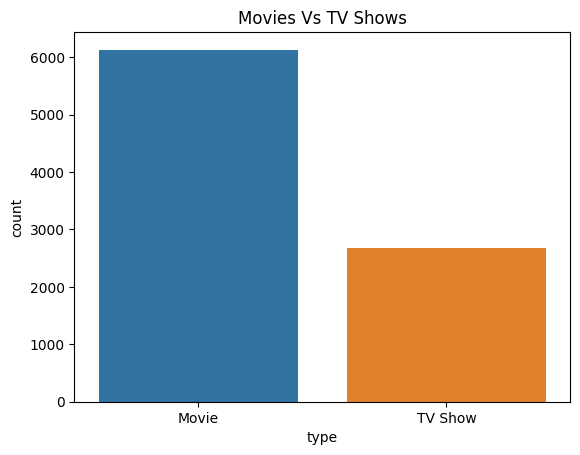

In [143]:
sns.countplot(data = df, x = 'type')  # used the original dataset as the exploded dataset will have duplicate rows for same movie/TV show
plt.title('Movies Vs TV Shows')
plt.show()

In [144]:
# Before analysing the director column, let's split the data for movies and tv shows
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']
print(movies.shape)
print(shows.shape)

(6128, 12)
(2676, 12)


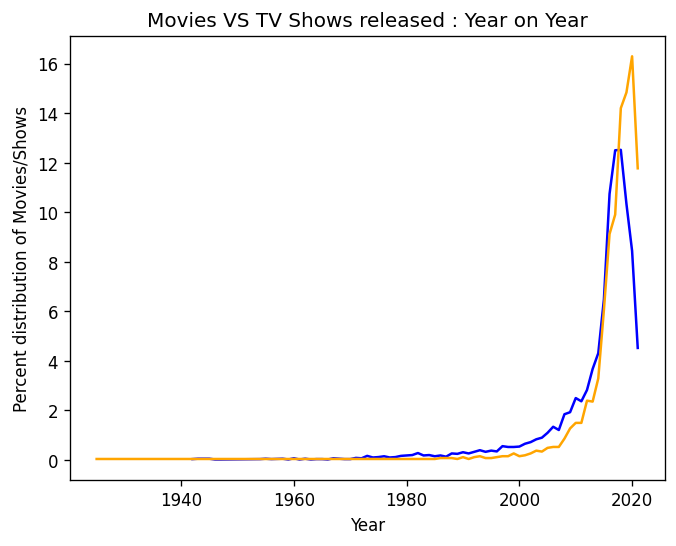

In [145]:
plt.figure(dpi = 120)
release_movies = movies['release_year'].value_counts(ascending = True, normalize = True) * 100
release_shows = shows['release_year'].value_counts(ascending = True, normalize = True) * 100
sns.lineplot(x = release_movies.index, y = release_movies.values, color = 'b')
sns.lineplot(x = release_shows.index, y = release_shows.values, color = 'Orange')
plt.title('Movies VS TV Shows released : Year on Year')
plt.xlabel('Year')
plt.ylabel('Percent distribution of Movies/Shows')
plt.show()

We have normalized the data here as the count for Movies and TV shows had a significant difference. Now, from the above chart we can see below points:
1. There is an active growth in content production every year. However, there is sudden drop post 2019 Covid as the world was in a lockdown stage.
2. The peak for movies seems to be at 2019 but for TV shows it is at 2020. Why so? As we just discussed that post 2019, there was a lockdown, the people couldn't go outside and hence, the opportunity for TV shows and OTT paltforms to grow created.

In [146]:
shows[shows['release_year']<1960]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1331,s1332,TV Show,Five Came Back: The Reference Films,[Unknown],[Unknown],[United States],"February 9, 2021",1945,TV-MA,1 Season,[TV Shows],This collection includes 12 World War II-era p...
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,[Unknown],[Unknown],[Unknown],"December 30, 2018",1925,TV-14,1 Season,[TV Shows],This collection restores films from women who ...
7743,s7744,TV Show,Pioneers of African-American Cinema,"[Oscar Micheaux, Spencer Williams, Richard E...",[Unknown],[United States],"February 1, 2017",1946,TV-14,1 Season,[TV Shows],This newly preserved collection features more ...


In [147]:
# let's extract the year in which the show/movie was added on netflix
movies['year_added'] = pd.to_datetime(movies['date_added']).dt.year
shows['year_added'] = pd.to_datetime(shows['date_added']).dt.year

<ipython-input-147-773fc73d6a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year_added'] = pd.to_datetime(movies['date_added']).dt.year
<ipython-input-147-773fc73d6a65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['year_added'] = pd.to_datetime(shows['date_added']).dt.year


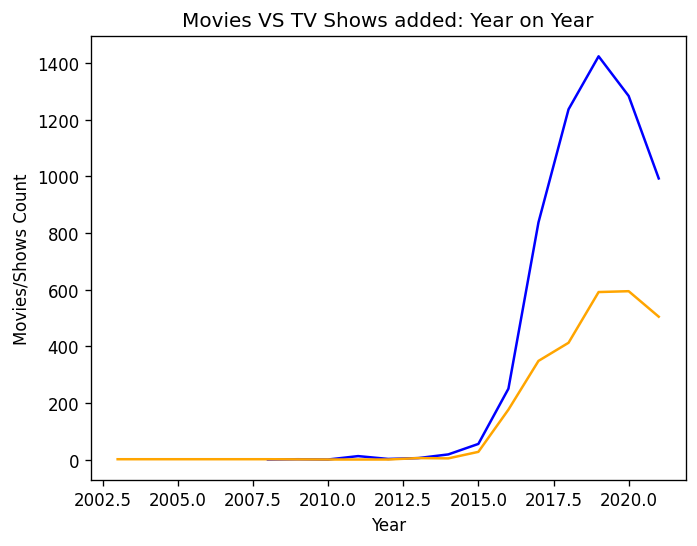

In [148]:
plt.figure(dpi = 120)
release_movies = movies['year_added'].value_counts(ascending = True)
release_shows = shows['year_added'].value_counts(ascending = True)
sns.lineplot(x = release_movies.index, y = release_movies.values, color = 'b')
sns.lineplot(x = release_shows.index, y = release_shows.values, color = 'Orange')
plt.title('Movies VS TV Shows added: Year on Year')
plt.xlabel('Year')
plt.ylabel('Movies/Shows Count')
plt.show()

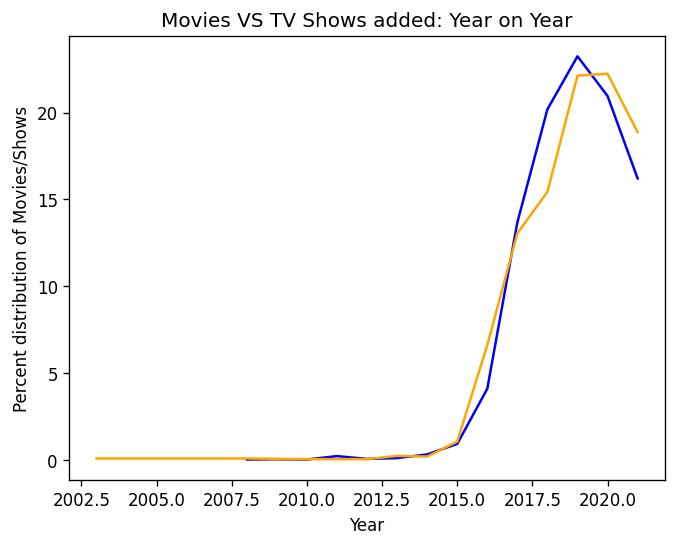

In [149]:
plt.figure(dpi = 120)
release_movies = movies['year_added'].value_counts(ascending = True, normalize = True) * 100
release_shows = shows['year_added'].value_counts(ascending = True, normalize = True) * 100
sns.lineplot(x = release_movies.index, y = release_movies.values, color = 'b')
sns.lineplot(x = release_shows.index, y = release_shows.values, color = 'Orange')
plt.title('Movies VS TV Shows added: Year on Year')
plt.xlabel('Year')
plt.ylabel('Percent distribution of Movies/Shows')
plt.show()

As for the count, for sure, much more movies were added to Netflix then TV shows. However, it seems that comparatively there is not much of a difference for Movies/TV shows added to the platform.

## Director Data

In [150]:
directors = df.explode('director')

In [151]:
directors.shape

(9609, 12)

In [152]:
top_20_directors = directors[directors['director'] != 'Unknown']['director'].value_counts().head(20).index

In [153]:
top_20_directors = directors[directors['director'].isin(top_20_directors)]

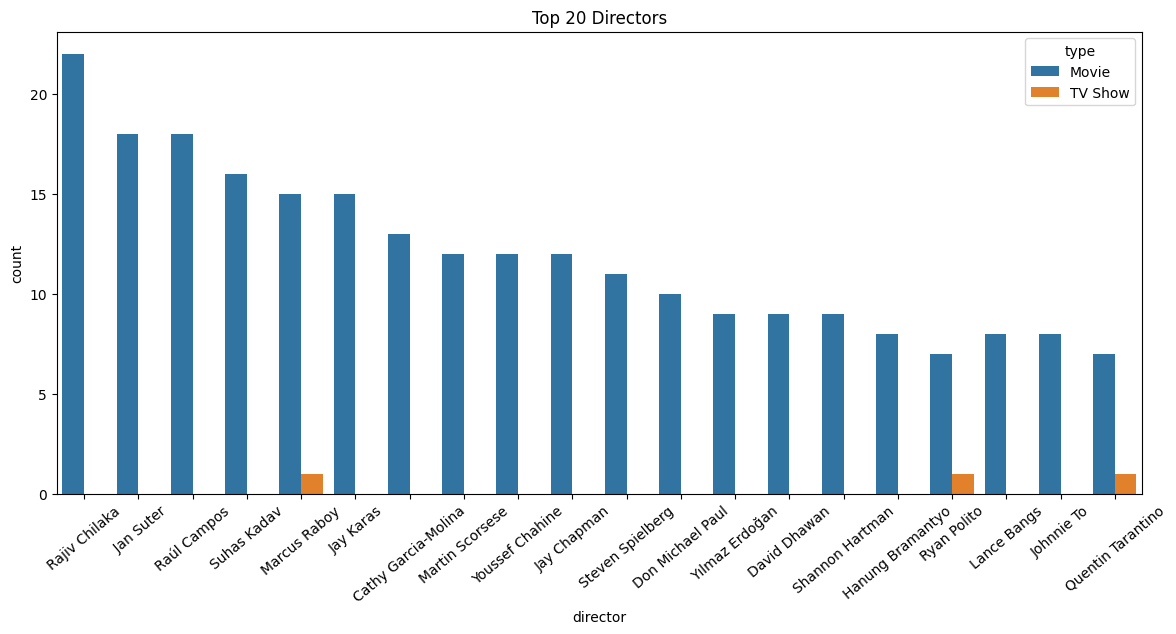

In [154]:
plt.figure(figsize = (14,6))
sns.countplot(data = top_20_directors, x = 'director', order = top_20_directors.director.value_counts().index, hue = 'type')
plt.xticks(rotation = 40)
plt.title('Top 20 Directors')
plt.show()

In [155]:
#sns.heatmap(data = top_20_directors)

In [156]:
# We can see that overall top directors are working on Movies majorly. Let's see the top directors for TV shows as well
tv_directors = shows.explode('director')

In [157]:
tv_directors.shape

(2758, 13)

In [158]:
top_20_tv_directors = tv_directors[tv_directors['director'] != 'Unknown']['director'].value_counts().head(20).index
top_20_tv_directors = tv_directors[tv_directors['director'].isin(top_20_tv_directors)]

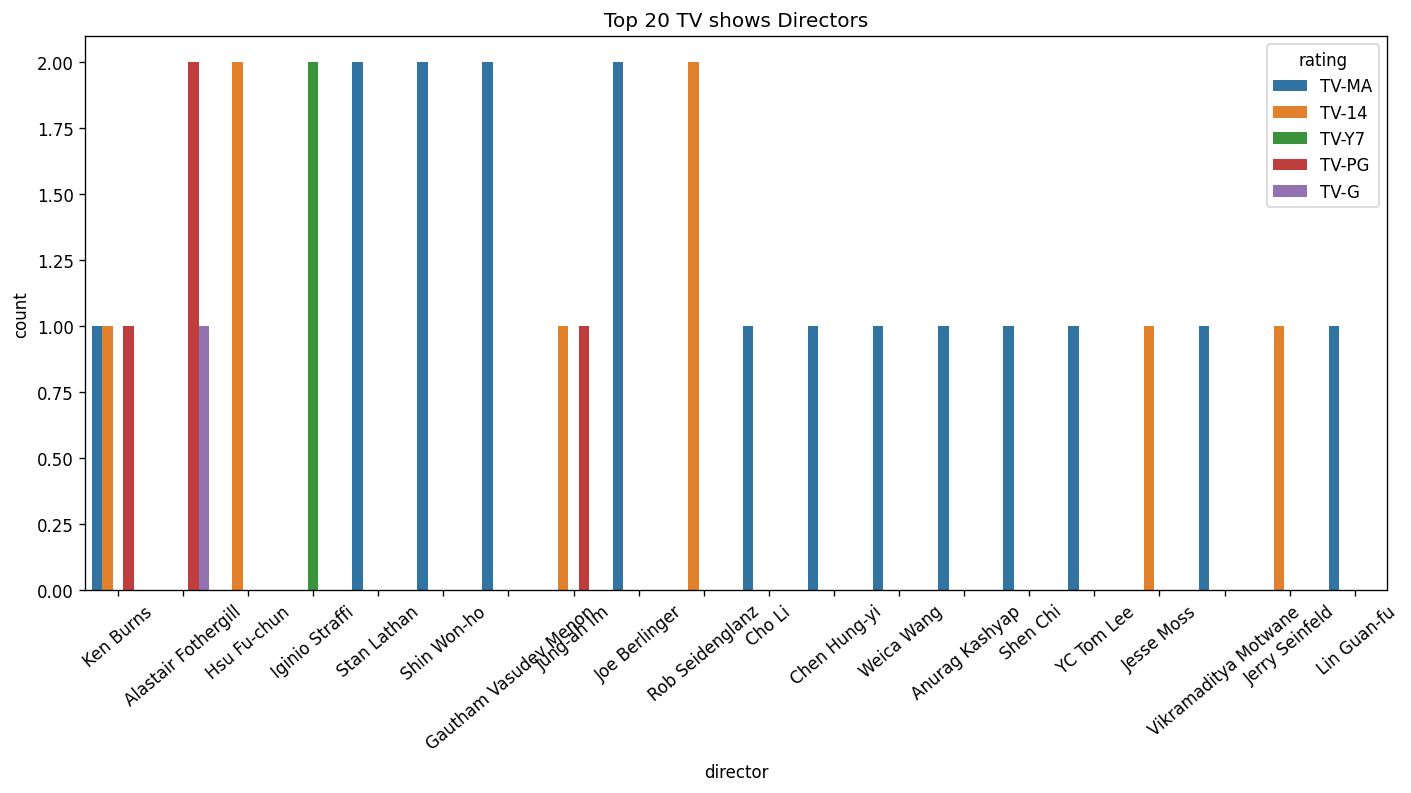

In [160]:
plt.figure(figsize = (14,6), dpi = 120)
sns.countplot(data = top_20_tv_directors, x = 'director', order = top_20_tv_directors.director.value_counts().index, hue = 'rating')
plt.xticks(rotation = 40)
plt.title('Top 20 TV shows Directors')
plt.show()

In [161]:
top_20_tv_directors[top_20_tv_directors['director'] == 'Hsu Fu-chun']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
316,s317,TV Show,Office Girls,Hsu Fu-chun,"[Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, ...",[Taiwan],"August 3, 2021",2011,TV-14,1 Season,"[International TV Shows, Romantic TV Shows, ...",A department store mogul has his son work inco...,2021
692,s693,TV Show,The Rational Life,Hsu Fu-chun,"[Qin Lan, Dylan Wang, Li Zonghan, Bao Wenji...",[Unknown],"June 18, 2021",2021,TV-14,1 Season,"[International TV Shows, Romantic TV Shows, ...",A career-driven 30-something must contend with...,2021


Majorly, top directors are working on content which is for mature audience.

## Movies data exploration

In [162]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",[Unknown],"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,2021
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[United States, Ghana, Burkina Faso, United...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s...",2021
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",[United States],"September 24, 2021",2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","[Germany, Czech Republic]","September 23, 2021",2021,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...,2021


In [163]:
movies['duration'] = movies['duration'].str.split(' ')

<ipython-input-163-d74ecf6c4c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split(' ')


In [164]:
def return_min(x):
  x['duration'] = x['duration'][0]
  return x

movies = movies.apply(return_min, axis = 1)
movies['duration'] = movies['duration'].astype('int')

In [165]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6128 non-null   object
 1   type          6128 non-null   object
 2   title         6128 non-null   object
 3   director      6128 non-null   object
 4   cast          6128 non-null   object
 5   country       6128 non-null   object
 6   date_added    6128 non-null   object
 7   release_year  6128 non-null   int64 
 8   rating        6128 non-null   object
 9   duration      6128 non-null   int64 
 10  listed_in     6128 non-null   object
 11  description   6128 non-null   object
 12  year_added    6128 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 670.2+ KB


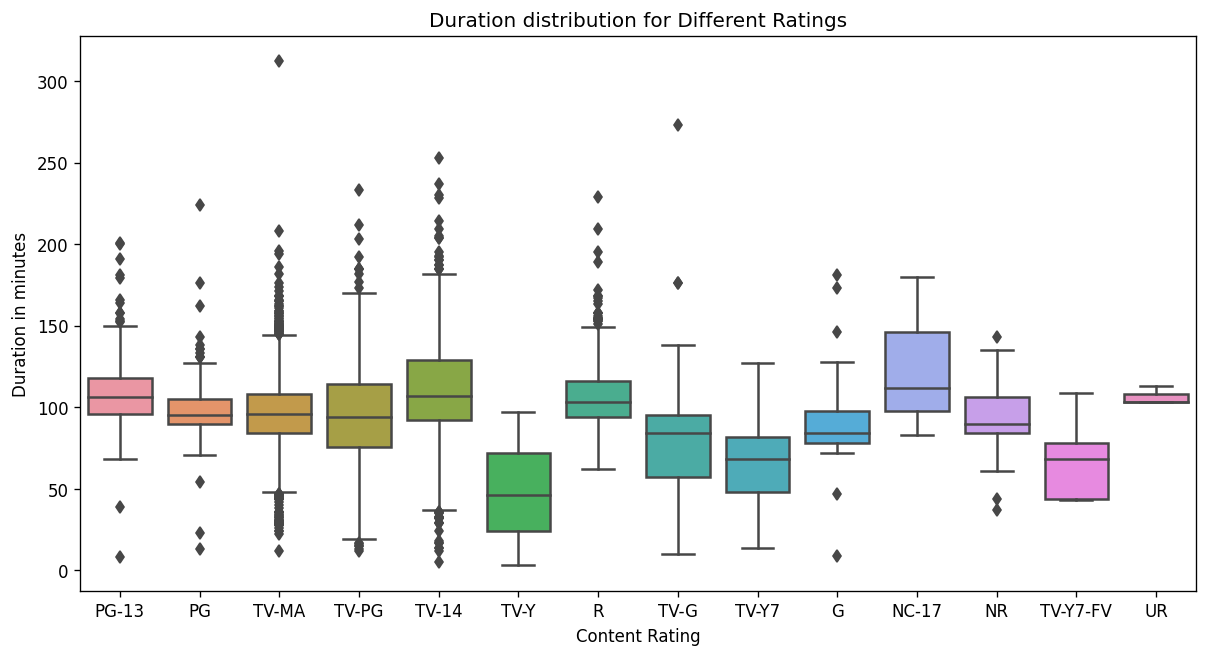

In [166]:
plt.figure(figsize = (12,6), dpi = 120)
sns.boxplot(data = movies, x = 'rating', y = 'duration')
plt.title('Duration distribution for Different Ratings')
plt.ylabel('Duration in minutes')
plt.xlabel('Content Rating')
plt.show()

In [167]:
movies[movies['duration']>200]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
166,s167,Movie,Once Upon a Time in America,[Sergio Leone],"[Robert De Niro, James Woods, Elizabeth McGo...","[Italy, United States]","September 1, 2021",1984,R,229,"[Classic Movies, Dramas]",Director Sergio Leone's sprawling crime epic f...,2021
717,s718,Movie,Headspace: Unwind Your Mind,[Unknown],"[Andy Puddicombe, Evelyn Lewis Prieto, Ginge...",[Unknown],"June 15, 2021",2021,TV-G,273,[Documentaries],"Do you want to relax, meditate or sleep deeply...",2021
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,[Hidenori Inoue],"[Sota Fukushi, Taichi Saotome, Shohei Miura,...",[Unknown],"June 2, 2021",2017,TV-14,204,"[Action & Adventure, Dramas, International M...","Japan, 1590. Wandering samurai band together t...",2021
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,[Hidenori Inoue],"[Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose...",[Unknown],"June 2, 2021",2017,TV-PG,212,"[Action & Adventure, Dramas, International M...","Japan, 1590. Wandering samurai band together t...",2021
1019,s1020,Movie,Lagaan,[Ashutosh Gowariker],"[Aamir Khan, Gracy Singh, Rachel Shelley, P...","[India, United Kingdom]","April 17, 2021",2001,PG,224,"[Dramas, International Movies, Music & Music...","In 1890s India, an arrogant British commander ...",2021
2126,s2127,Movie,What's Your Raashee?,[Ashutosh Gowariker],"[Harman Baweja, Priyanka Chopra, Manju Singh...",[India],"August 15, 2020",2009,TV-PG,203,"[Comedies, International Movies, Music & Mus...","To protect his family from ruin, Yogesh must m...",2020
2483,s2484,Movie,Fifty Year Old Teenager,[Fouad Al Shatti],"[Abdulhussain Abdulredah, Haifaa Adel, Dawoo...",[Unknown],"May 21, 2020",1996,TV-14,204,"[Comedies, International Movies]",The life of a married 50-year-old doctor turns...,2020
2484,s2485,Movie,Lock Your Girls In,[Fouad El-Mohandes],"[Fouad El-Mohandes, Sanaa Younes, Sherihan, ...",[Unknown],"May 21, 2020",1982,TV-PG,233,"[Comedies, International Movies, Romantic Mo...",A widower believes he must marry off his three...,2020
2487,s2488,Movie,No Longer kids,[Samir Al Asfory],"[Said Saleh, Hassan Moustafa, Ahmed Zaki, Y...",[Egypt],"May 21, 2020",1979,TV-14,237,"[Comedies, Dramas, International Movies]",Hoping to prevent their father from skipping t...,2020
2488,s2489,Movie,Raya and Sakina,[Hussein Kamal],"[Suhair El-Babili, Shadia, Abdel Moneim Madb...",[Unknown],"May 21, 2020",1984,TV-14,230,"[Comedies, Dramas, International Movies]",When robberies and murders targeting women swe...,2020


We can see from our boxplots that mainly the movie duration is near 100 minutes only. We sure do have few outliers and as checked, they seem to be documentries or classic movies.

##Heatmap - no insights

In [177]:
last_5_years = df[(df['release_year']<2022) & (df['release_year']>2016)]
last_5_years = last_5_years.explode('listed_in')

In [178]:
last_5_years = last_5_years.explode('country')

In [200]:
top_10_genres_5_years = last_5_years['listed_in'].value_counts().head(10).index
top_10_country_5_years = last_5_years[last_5_years['country'] != 'Unknown']['country'].value_counts().head(10).index

In [204]:
# we will now slice our data to have top 25 values data only
last_5_years = last_5_years[last_5_years['country'].isin(top_10_country_5_years)]
last_5_years = last_5_years[last_5_years['listed_in'].isin(top_10_genres_5_years)]

In [205]:
top_10_genres_5_years

Index([' International Movies', 'Dramas', 'Documentaries', 'Comedies',
       ' Independent Movies', ' International TV Shows', ' TV Dramas',
       ' Dramas', ' Thrillers', 'International TV Shows'],
      dtype='object')

<Axes: xlabel='None-listed_in', ylabel='country'>

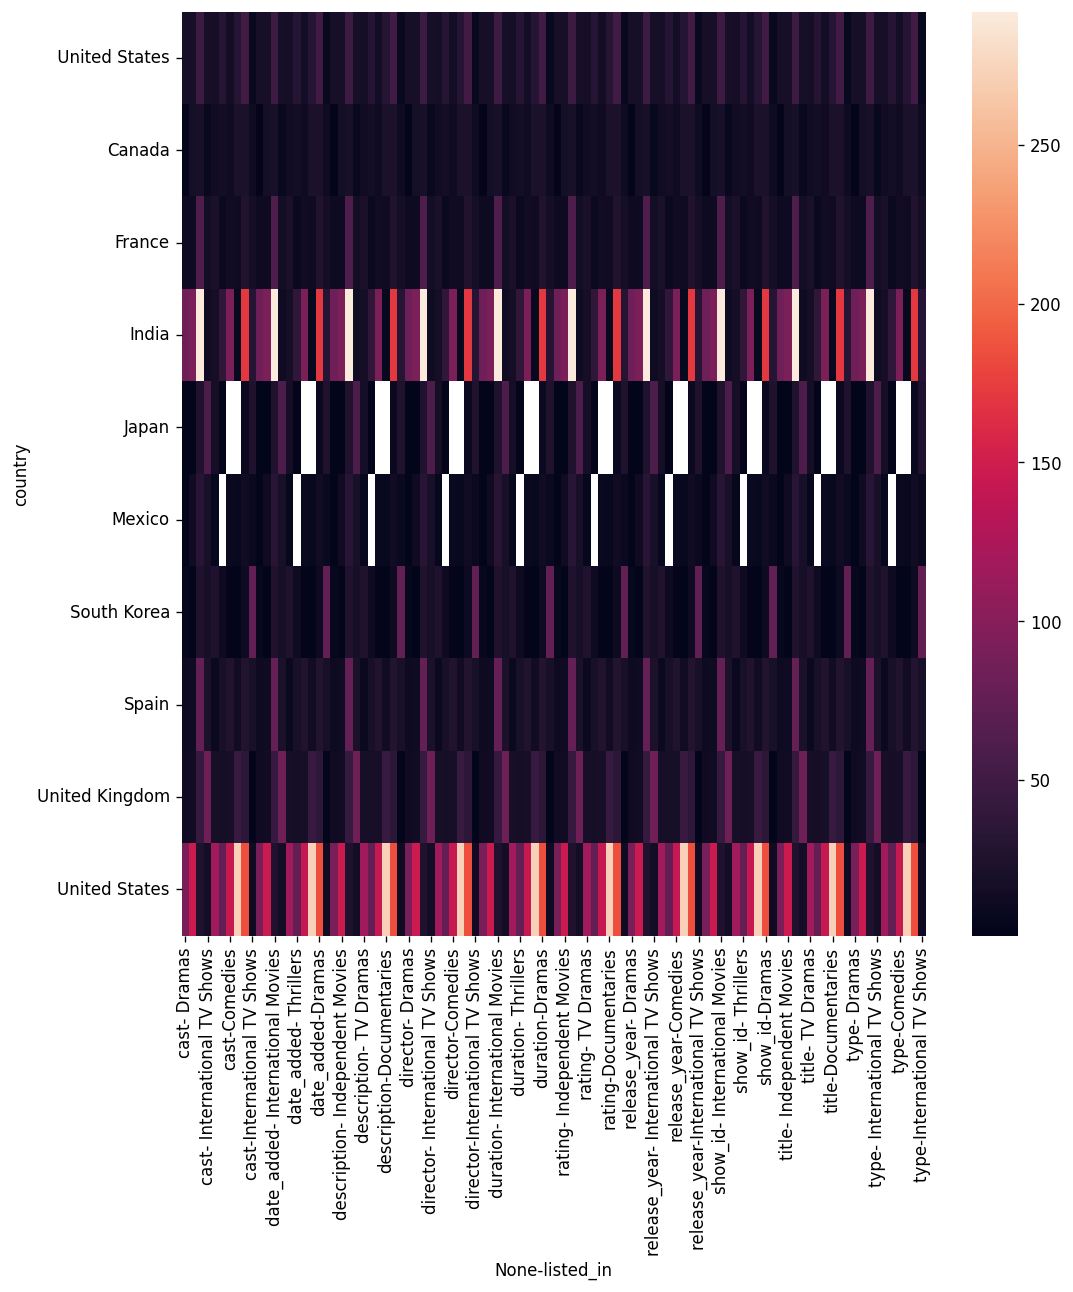

In [206]:
plt.figure(figsize = (10,10), dpi = 120)
sns.heatmap(pd.pivot_table(last_5_years, index = 'country', columns = 'listed_in',aggfunc='count'))

In [ ]:
sns.countplot(data =  last_5_years, x = 'listed_in')

## Cast

In [208]:
cast_exploded = df.explode('cast')

In [216]:
# top 10 cast
top_10_cast = cast_exploded['cast'].value_counts().iloc[1:11]

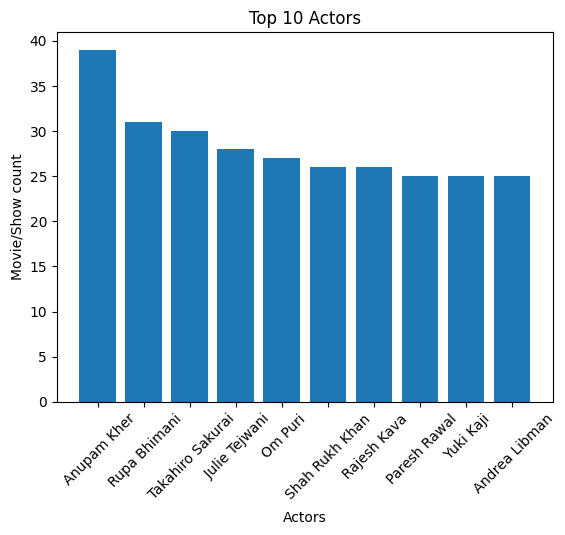

In [222]:
plt.bar(x = top_10_cast.index, height = top_10_cast)
plt.xticks(rotation = 45)
plt.title('Top 10 Actors')
plt.xlabel('Actors')
plt.ylabel('Movie/Show count')
plt.show()

## Genres

In [228]:
movies_listed = movies.explode('listed_in')

In [252]:
movies_listed['listed_in'] = movies_listed['listed_in'].apply(lambda x: x.strip().lower().capitalize())

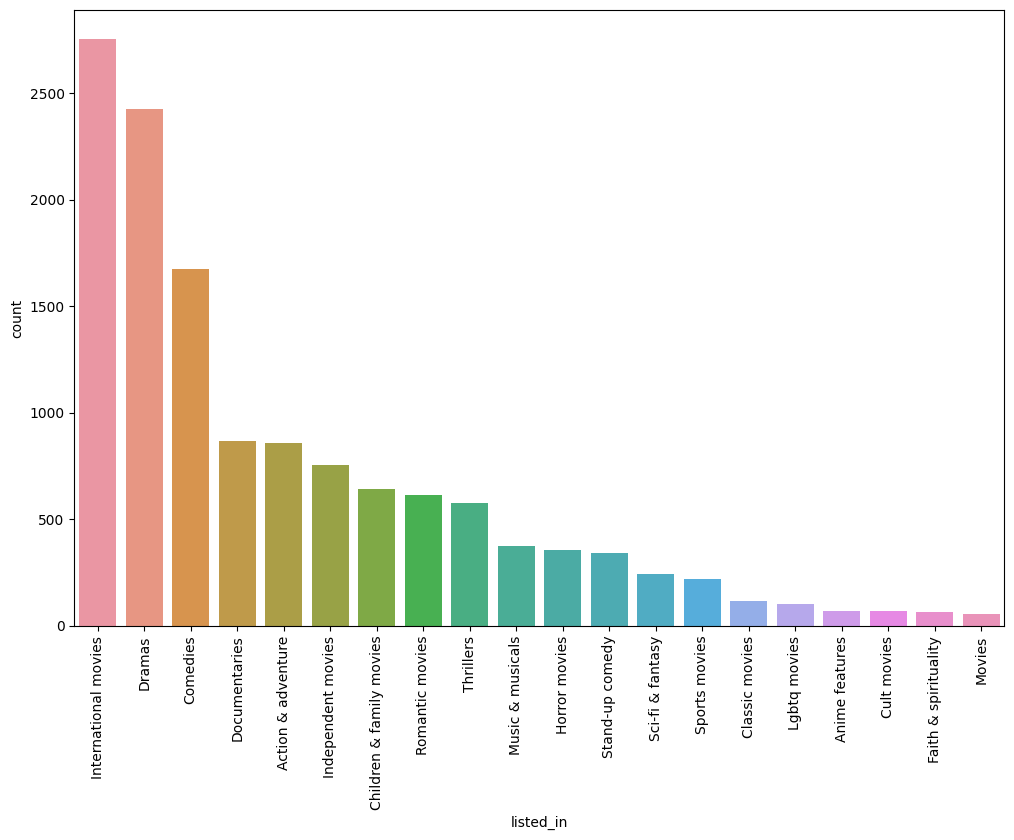

In [253]:
plt.figure(figsize = (12,8), dpi = 100)
sns.countplot(data = movies_listed, x = 'listed_in', order= movies_listed['listed_in'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

In [230]:
shows_listed = shows.explode('listed_in')

In [250]:
shows_listed['listed_in'] = shows_listed['listed_in'].apply(lambda x: x.strip().lower().capitalize())

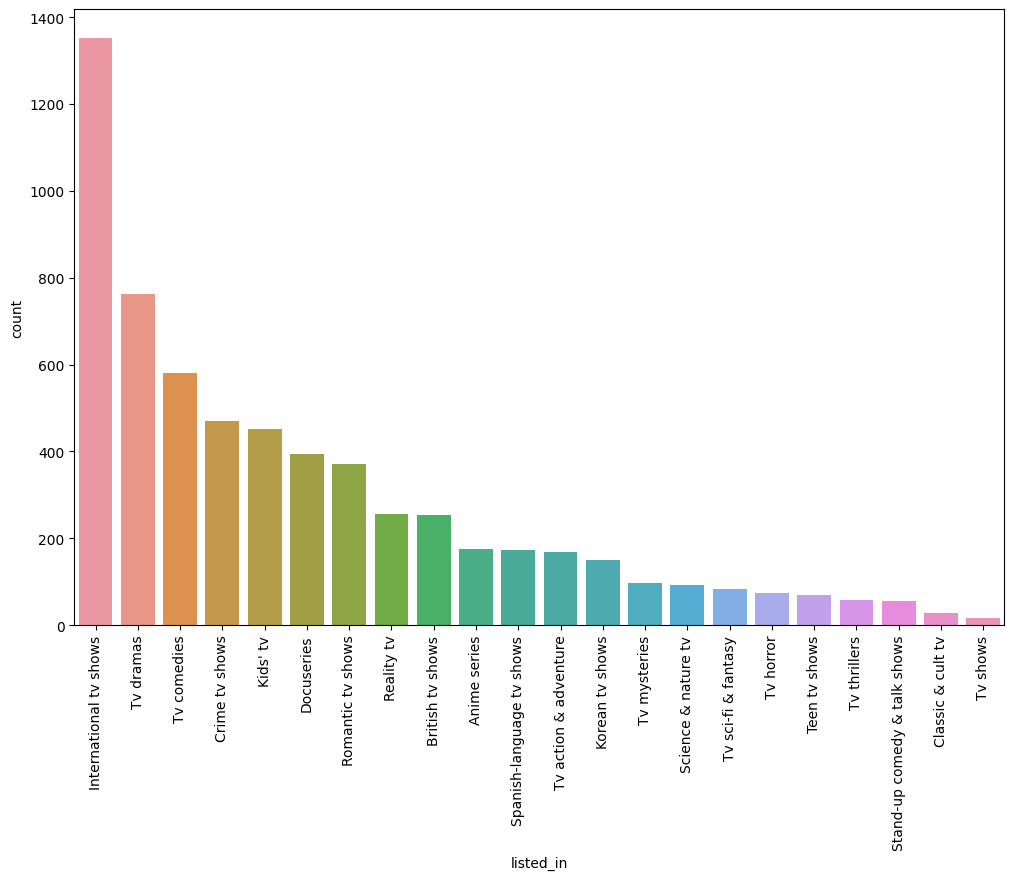

In [251]:
plt.figure(figsize = (12,8), dpi = 100)
sns.countplot(data = shows_listed, x = 'listed_in', order= shows_listed['listed_in'].value_counts().head(30).index)
plt.xticks(rotation = 90)
plt.show()

## Country

In [232]:
country_exploded = df.explode('country')

In [247]:
country_exploded['country'] = country_exploded['country'].apply(lambda x: x.strip().lower().capitalize())

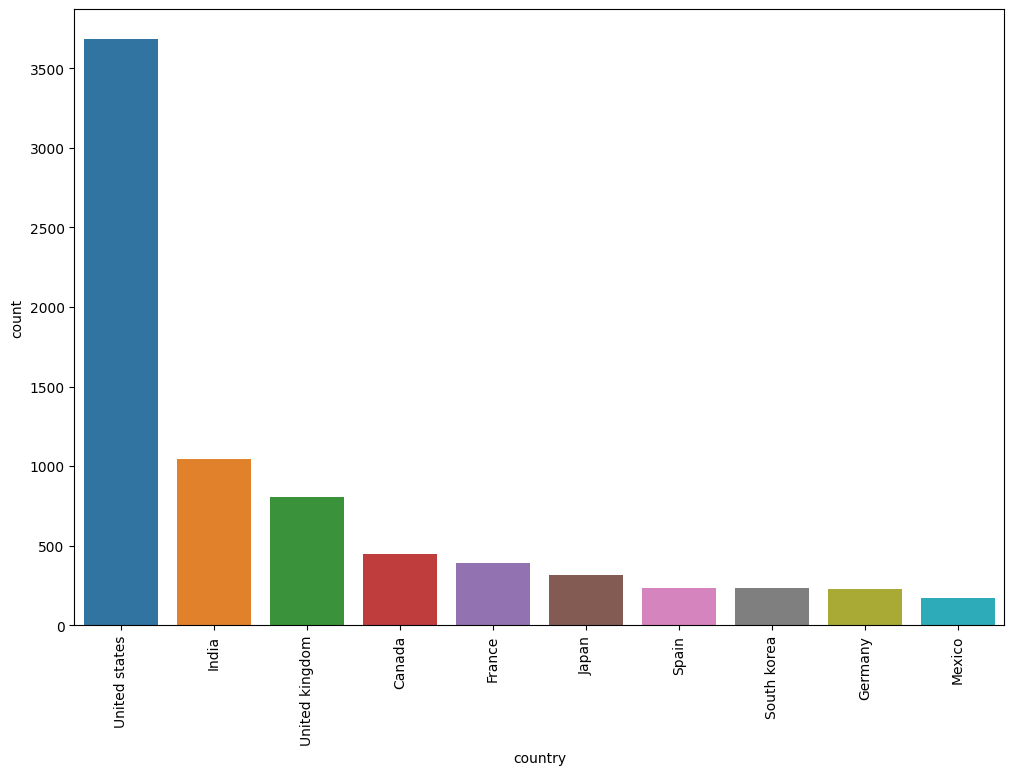

In [249]:
plt.figure(figsize = (12,8), dpi = 100)
sns.countplot(data = country_exploded[country_exploded['country']!='Unknown'], x = 'country', order= country_exploded[country_exploded['country']!='Unknown']['country'].value_counts().head(10).index)
plt.xticks(rotation = 90)
plt.show()

# Business Insights

1. **Movies vs Tv shows** - With our analysis, we can see that currently we have more movies on our platform. However, if we see the tren, the TV shows industry has grown significantly and post covid, people are hinged to their mobie phone and prefer to stay at home.

Hence, we should add more TV shows on the platform.

2. **Genres** - Be it a Movie or a TV show, few of the most popular Genres are : Drama, Comedy, Documentries and Crime. We would recommend to maintain the content for these Genres on platform. Additionally, Kids are getting more access to digital content and youngster's are getting more inclined towards Anime series as well. Hence, it would be beneficial to focus more on these segment and increase the content.

3. **Country and Cast** - Undoubtley, few of the Kdramas are good and US seems to be producing the most number of content. However, if we just look at the top cast,  majority of the actors are from India.

As India has a huge potential viewer base, we would recommend to add more content that has developed in India and preferable consist of top rated Indian cast.

4. **Content Rating** - As we have seen that mainly the directors are focusing on creating content for mature audience also the major traffic on the platform is of 14+ in age. We will keep on maintaing the relevant content and simultaneously add few of kid rated content as well.
